#  Customer Segmentation Analysis

### Problem Statement
You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly

### Importing the Neccessary Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Loding the dataset

In [3]:
df=pd.read_csv('Dataset/Mall_Customers.csv')

### 3.1) Univarient Analysis

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.duplicated().sum()

0

In [10]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df.Gender.mode()

0    Female
Name: Gender, dtype: object

<AxesSubplot: xlabel='Gender', ylabel='Count'>

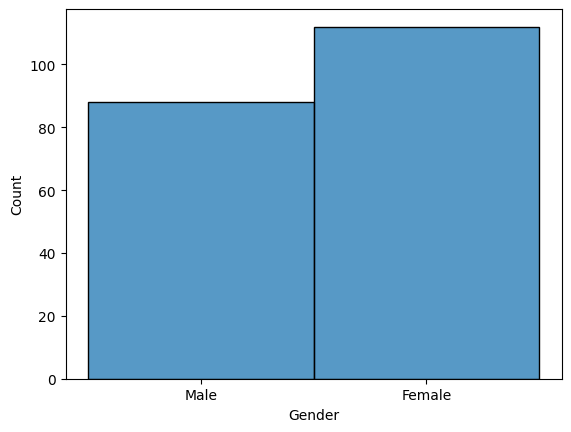

In [16]:
sns.histplot(df.Gender)

### 3.2) Bi-Varient Analysis

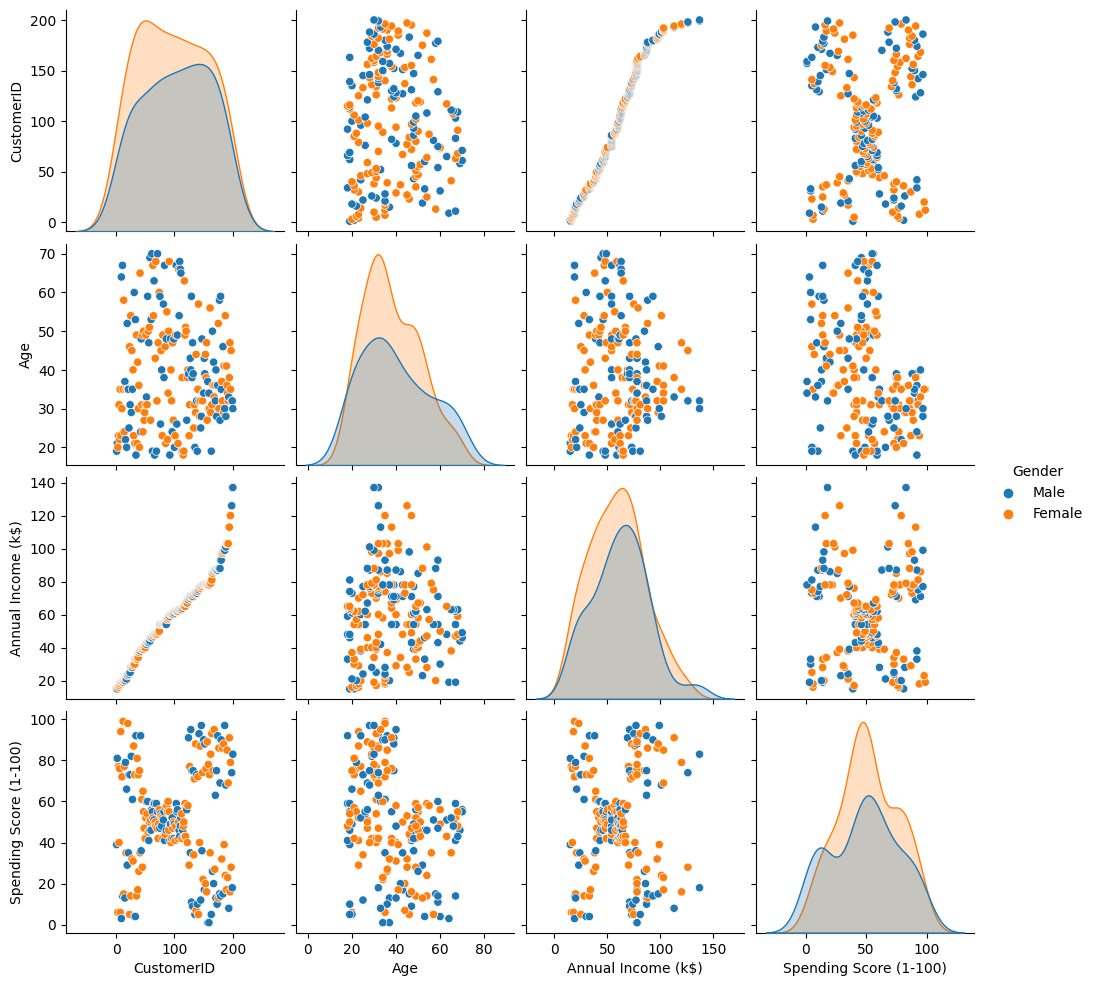

In [18]:
sns.pairplot(df, hue="Gender")

/tmp/ipykernel_3927/2103883654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

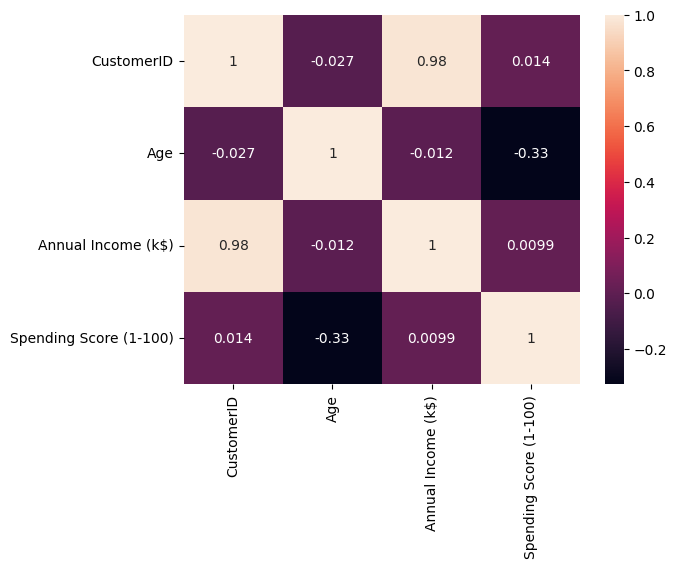

In [22]:
# Finding the correlation between the data
sns.heatmap(df.corr(),annot=True)

###  3.3) Multivariant Analysis

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

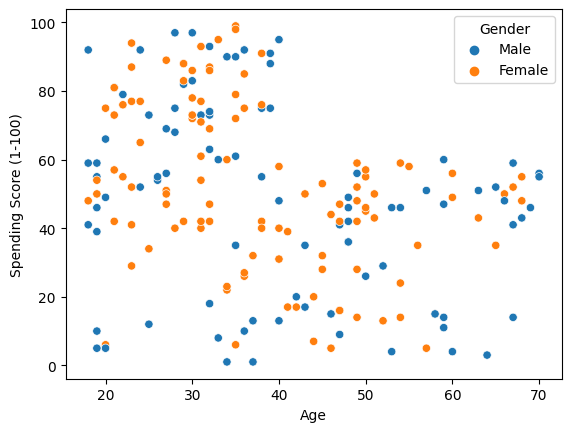

In [29]:
sns.scatterplot(x=df.Age, y=df["Spending Score (1-100)"],hue=df.Gender)

### 4) Perform descriptive statics on the dataset

In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.var()

/tmp/ipykernel_3927/1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [32]:
df.std()

/tmp/ipykernel_3927/3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [33]:
df.skew()

/tmp/ipykernel_3927/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [34]:
df.kurt()

/tmp/ipykernel_3927/1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

### 5) Dealing with the missing values

In [35]:
df.isnull().sum().sum()
# There is no null Value)

0

### 6) Finding and replacing the outliers

/home/hari/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

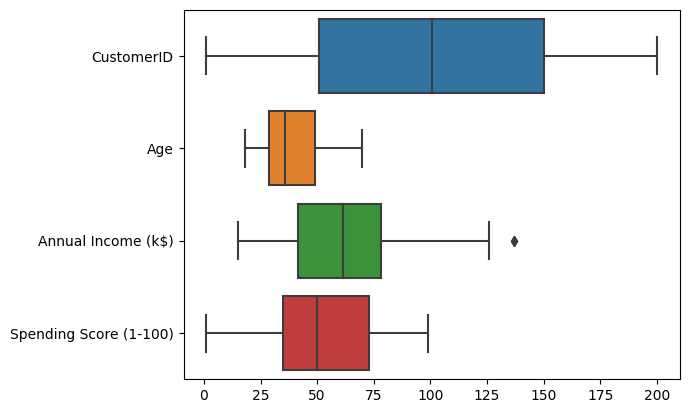

In [36]:
sns.boxplot(df,orient='h')

In [37]:
# Replacing the outlier of the Annual income with the Mean Value
# calculating thre upper and lower limit using the below formula
# upper extreme =Q3 + 1.5*IQR
# lower extreme =Q1-1.5*IQR
# IQR =  Q3-Q1
# Q3 is quantile of 0.75
# Q1 is quantile of 0.25

In [41]:
# qunatile
qnt = df.quantile(q=(0.75,0.25))
qnt

/tmp/ipykernel_3927/2331211532.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qnt = df.quantile(q=(0.75,0.25))


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [45]:
IQR=qnt.loc[0.75]-qnt.loc[0.25]
IQR

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [46]:
u_e=qnt.loc[0.75]+1.5*IQR
u_e

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [53]:
l_e=qnt.loc[0.25]-1.5*IQR
l_e

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [55]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>u_e["Annual Income (k$)"],df["Annual Income (k$)"].mean(),df["Annual Income (k$)"])

/home/hari/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

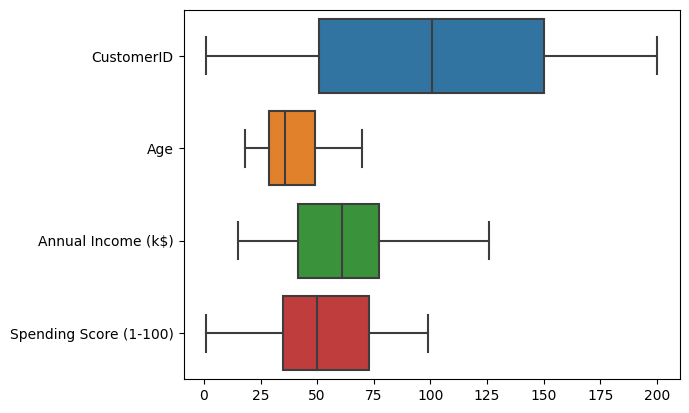

In [57]:
sns.boxplot(df,orient='h')

### 7) Handeling the categorical Data

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
l_encod=LabelEncoder()

In [63]:
df.Gender=l_encod.fit_transform(df.Gender)

In [66]:
df.head() # It encoded 1 as Male and 0 as Female

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


### 8) Scaling the data

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scale=MinMaxScaler()
df1=scale.fit_transform(df)

In [88]:
scale

MinMaxScaler()

### 9) Performing K-Means Clustering algorithm

In [89]:
from sklearn.cluster import KMeans

In [90]:
T_WSS=[]

In [91]:
k=list(range(2,9))

In [94]:
for i in k:
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df1)
    T_WSS.append(kmeans.inertia_)

In [95]:
T_WSS

[55.03480657016514,
 43.75184180938364,
 35.16299336308417,
 29.860085780226875,
 25.267218921912814,
 20.70114613214541,
 17.218384876978856]

([<matplotlib.lines.Line2D at 0x7f4a943f1a50>],
 Text(0.5, 0, 'No. of Clusters'),
 Text(0, 0.5, 'TWSS'))

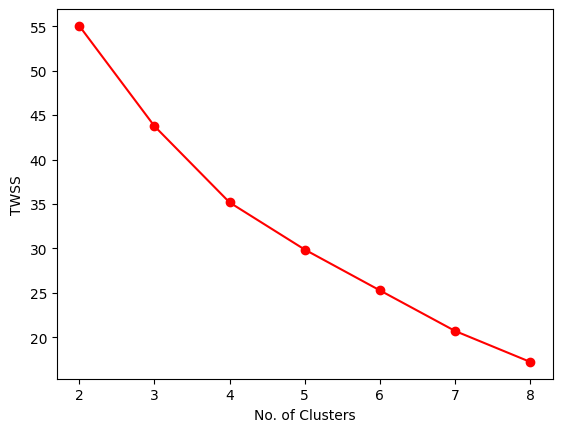

In [99]:
plt.plot(k,T_WSS,'ro-'),plt.xlabel('No. of Clusters'),plt.ylabel('TWSS')

In [100]:
model=KMeans(n_clusters=4)
model.fit(df1)

KMeans(n_clusters=4)

In [102]:
model.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 3, 1, 2, 0, 2, 3, 1, 2, 2, 2,
       2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 0], dtype=int32)

### 10) Adding the cluster data to the primary dataset

In [103]:
df["Cluster"]=pd.Series(model.labels_)

In [104]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15.0,39,2
1,2,1,21,15.0,81,2
2,3,0,20,16.0,6,1
3,4,0,23,16.0,77,1
4,5,0,31,17.0,40,1


### 11) Split the data into dependent and independent

In [105]:
x=df.iloc[:,:-1]
x

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.00,39
1,2,1,21,15.00,81
2,3,0,20,16.00,6
3,4,0,23,16.00,77
4,5,0,31,17.00,40
...,...,...,...,...,...
195,196,0,35,120.00,79
196,197,0,45,126.00,28
197,198,1,32,126.00,74
198,199,1,32,60.56,18


In [106]:
y=df.iloc[:,-1]
y

0      2
1      2
2      1
3      1
4      1
      ..
195    3
196    3
197    0
198    0
199    0
Name: Cluster, Length: 200, dtype: int32

### 12) Splitting data for test and train

In [107]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [110]:
x_train.shape,x_test.shape

((160, 5), (40, 5))

### 13) Building the RandomForest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

### 14) Training the Model

In [119]:
train_pred=rf.predict(x_train)
train_pred

array([3, 3, 0, 2, 1, 2, 0, 0, 0, 3, 2, 3, 1, 0, 3, 1, 2, 0, 0, 0, 1, 1,
       1, 3, 3, 0, 2, 1, 1, 3, 1, 0, 2, 2, 2, 0, 1, 3, 1, 1, 2, 0, 3, 0,
       0, 1, 2, 2, 3, 0, 1, 2, 3, 3, 1, 2, 1, 1, 1, 1, 3, 3, 3, 2, 0, 0,
       3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 0, 1, 1, 1, 3, 1, 3, 0, 0, 3, 2, 1,
       2, 1, 3, 0, 3, 3, 2, 3, 1, 0, 1, 1, 0, 2, 1, 0, 3, 0, 0, 3, 0, 1,
       2, 2, 0, 3, 3, 0, 3, 2, 1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 3, 2, 0, 1,
       3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 3,
       1, 0, 3, 3, 0, 1], dtype=int32)

### 15) Testing the model

In [121]:
test_pred=rf.predict(x_test)
test_pred

array([3, 2, 2, 2, 3, 2, 2, 3, 0, 3, 3, 2, 1, 0, 1, 1, 2, 2, 0, 0, 3, 3,
       3, 2, 3, 1, 0, 3, 2, 0, 0, 3, 2, 3, 1, 2, 1, 2, 1, 3], dtype=int32)

### 16) Measuring the performance using the evaluvation metrics

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [124]:
accuracy_score(y_test,test_pred)

0.975

In [125]:
confusion_matrix(y_test,test_pred)

array([[ 7,  0,  1,  0],
       [ 0,  7,  0,  0],
       [ 0,  0, 12,  0],
       [ 0,  0,  0, 13]])